# Simple Linear Regression

Here we will explore Simple Linear Regression in Python.

Regression is a statistical method to model a relationship between a dependent and an independent variable.

> Note: Sklearn models use either `Snake Case` for all `functions` and `Pascal Case` for all `Classes`.

---


Author: Shantanu Shaji

PRN: 24070126165

Class: AIML C1

Title: Implementation of Simple Linear Regression.
-
Aim: To Apply regression algorithm predictions.

Objective:
- Implementation of a simple linear regression algorithm on the given dataset
-	To visualize and interpret the result


## Lab Content

#### Importing Libraries and Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import userdata
root = userdata.get('sml_ds')

In [ ]:
data = pd.read_csv(f'{root}/Datasets/slr_ds.csv')
display(data.head())

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### Extracting Data into Variables


In [ ]:
x = data.iloc[:, :-1].values #selects all rows first. then selects all columns up to the second last column.
y = data.iloc[:, -1].values #selects all the rows. then selects the last column.

Splitting Train/Test Sets

In [ ]:
from sklearn.model_selection import train_test_split #used to split data in to train test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 69)
display(x_train, x_test, y_train, y_test)

array([[ 4.1],
       [ 1.5],
       [ 3.2],
       [ 3.2],
       [ 5.9],
       [ 2. ],
       [ 5.1],
       [ 9.5],
       [ 2.2],
       [ 3.9],
       [ 2.9],
       [ 4. ],
       [ 1.1],
       [ 3. ],
       [ 1.3],
       [ 9.6],
       [10.5],
       [ 5.3],
       [ 6.8],
       [ 8.2],
       [10.3],
       [ 3.7],
       [ 4. ],
       [ 7.9]])

array([[7.1],
       [4.5],
       [8.7],
       [6. ],
       [9. ],
       [4.9]])

array([ 57081.,  37731.,  64445.,  54445.,  81363.,  43525.,  66029.,
       116969.,  39891.,  63218.,  56642.,  56957.,  39343.,  60150.,
        46205., 112635., 121872.,  83088.,  91738., 113812., 122391.,
        57189.,  55794., 101302.])

array([ 98273.,  61111., 109431.,  93940., 105582.,  67938.])

####  Performing the Simple Linear Regression


Fitting the model

In [ ]:
#import model for linear regression.
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Viewing training predictions

In [ ]:
# For the training data
pred_y = regressor.predict(x_train)
display(pred_y, regressor.score(x_train, y_train))

array([ 64516.66076756,  40089.76807024,  56061.1979108 ,  56061.1979108 ,
        81427.58648109,  44787.24743511,  73911.6194973 , 115249.43790814,
        46666.23918106,  62637.66902161,  53242.71029188,  63577.16489459,
        36331.78457835,  54182.20616485,  38210.77632429, 116188.93378112,
       124644.39663788,  75790.61124325,  89883.04933785, 103035.99155949,
       122765.40489193,  60758.67727567,  63577.16489459, 100217.50394056])

0.9631886670557118

### Evaluating the model
We can use several methods for calculating the score of a model or evaluate it.

#### R<sup>2</sup>
The below score function calculates the **Coefficient of Determination <u>R<sup>2</sup></u>**

$$R^{2}=1-\frac{SS_{res}}{SS_{tot}}$$

Where,

- **SS<sub>res</sub>** is the residual sum of squares (**actual vs predicted**)

- **SS<sub>tot</sub>** is the total sum of squares (**actual vs mean of actual**)


In [ ]:
# For the test data
pred_y = regressor.predict(x_test)
display(pred_y, regressor.score(x_test, y_test))

array([ 92701.53695677,  68274.64425946, 107733.47092435,  82367.08235406,
       110551.95854328,  72032.62775135])

0.8711824073761935

##### **Mean Absolute Error**
$$MAE=\frac{1}{n}\sum _{i=1}^{n}|y_{i}-y_{j}|$$

Where

y<sub>i</sub> is the actual value for the \(i\)-th observation

y<sub>j</sub> is the predicted value for the \(i\)-th observation

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred_y)
print("MAE: ", mae)

MAE:  5845.023386481921


##### **Mean Squared Error**
$$MSE=\frac{1}{n}\sum _{i=1}^{n}(y_{i}-{y}_{j})^{2}$$

Where

y<sub>i</sub> is the actual value for the \(i\)-th observation

y<sub>j</sub> is the predicted value for the \(i\)-th observation

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred_y)
print("MSE: ", mse)

MSE:  43439915.27739911


##### **Root Mean Squared Error**

$$RMSE=\sqrt{\frac{1}{n}\sum _{i=1}^{n}(y_{i}-{y}_{j})^{2}}$$

Where

y<sub>i</sub> is the actual value for the \(i\)-th observation

y<sub>j</sub> is the predicted value for the \(i\)-th observation

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred_y))
print("RMSE:", rmse)

RMSE: 6590.896394072593


## Revision

Exploring some more regression in housing data.

#### Import Libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target # This is our target variable (Price)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Performing Basic EDA and Preprocessing.

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


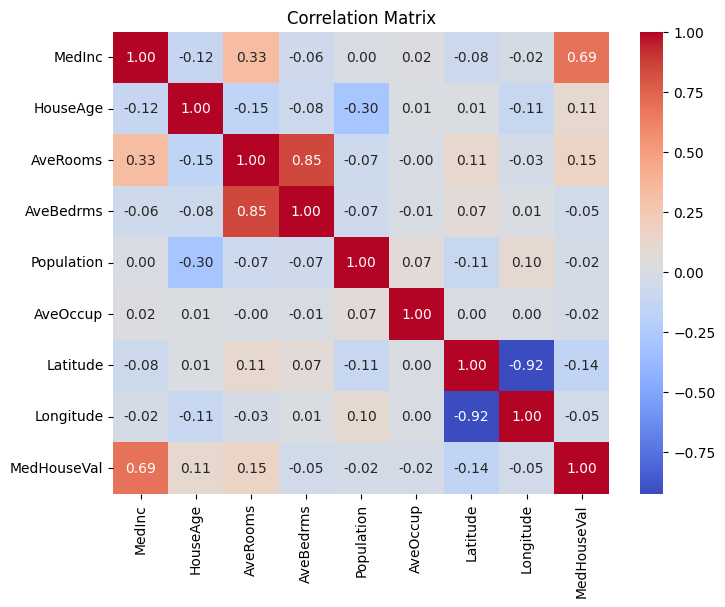

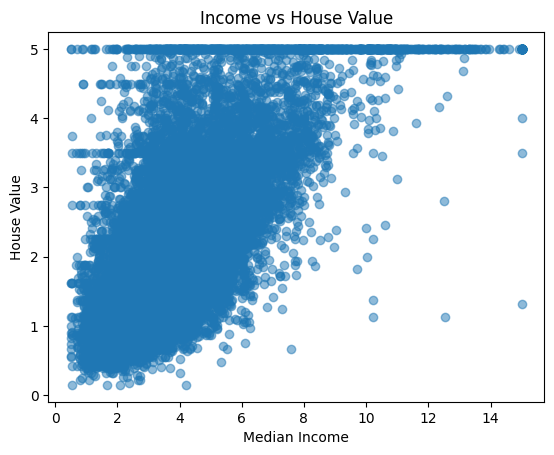

In [ ]:
# Check for nulls
print(df.isnull().sum())

# Correlation check
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Scatter plot for Simple Linear Regression
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.5)
plt.xlabel('Median Income')
plt.ylabel('House Value')
plt.title('Income vs House Value')
plt.show()

The above heatmap shows that there is a high correlation between income and house value.

#### Applying Linear Regression

In [ ]:
X = df[['MedInc']]
y = df['MedHouseVal']

# Split data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
predictions = model.predict(X_test)
predictions

array([1.14958917, 1.50606882, 1.90393718, ..., 4.31500772, 1.612455  ,
       1.93412956])

#### Evaluating the results

MAE: 0.629908653009376
MSE: 0.7091157771765549
RMSE: 0.8420901241414455
R^2 Score: 0.45885918903846656


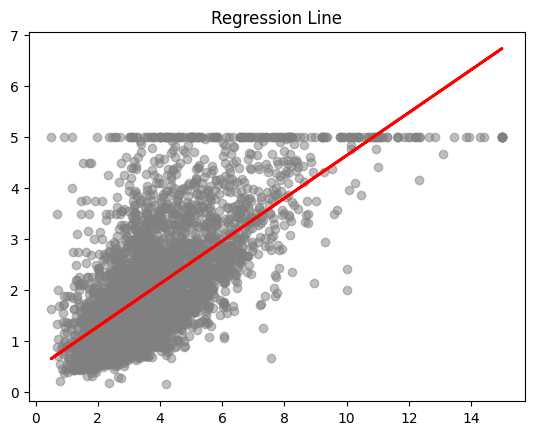

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2 Score:', metrics.r2_score(y_test, predictions))

# Visualize the Regression Line
plt.scatter(X_test, y_test, color='gray', alpha=0.5)
plt.plot(X_test, predictions, color='red', linewidth=2)
plt.title('Regression Line')
plt.show()